In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# 1. Load data
df = pd.read_csv('retail_store_sales.csv')


In [3]:
df.head

<bound method NDFrame.head of       Transaction ID Customer ID       Category          Item  Price Per Unit  \
0        TXN_6867343     CUST_09     Patisserie   Item_10_PAT            18.5   
1        TXN_3731986     CUST_22  Milk Products  Item_17_MILK            29.0   
2        TXN_9303719     CUST_02       Butchers   Item_12_BUT            21.5   
3        TXN_9458126     CUST_06      Beverages   Item_16_BEV            27.5   
4        TXN_4575373     CUST_05           Food   Item_6_FOOD            12.5   
...              ...         ...            ...           ...             ...   
12570    TXN_9347481     CUST_18     Patisserie   Item_23_PAT            38.0   
12571    TXN_4009414     CUST_03      Beverages    Item_2_BEV             6.5   
12572    TXN_5306010     CUST_11       Butchers    Item_7_BUT            14.0   
12573    TXN_5167298     CUST_04      Furniture    Item_7_FUR            14.0   
12574    TXN_2407494     CUST_23           Food   Item_9_FOOD            17.0  

In [4]:
# 2. Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [5]:
# 3. Convert transaction_date to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')

In [6]:
# 4. Strip and title-case string columns
text_columns = ['category', 'item', 'payment_method', 'location']
for col in text_columns:
    df[col] = df[col].astype(str).str.strip().str.title()


Text(0.5, 1.0, 'Missing Value Heatmap')

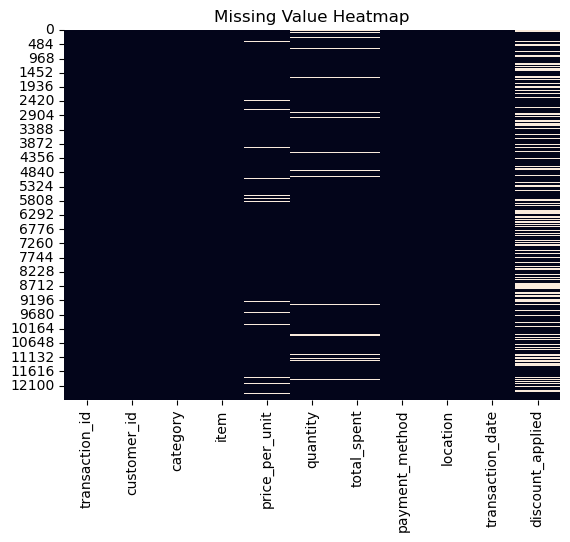

In [13]:
# 5. Check and fill or drop missing values
# Visualize missing
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Value Heatmap")


In [14]:
# Fill missing quantities with median
df['quantity'].fillna(df['quantity'].median(), inplace=True)

In [15]:
# Fill price with median
df['price_per_unit'].fillna(df['price_per_unit'].median(), inplace=True)


In [16]:
# Recalculate total_spent if needed
df['total_spent'] = df['price_per_unit'] * df['quantity']

In [17]:
# Fill missing items with "Unknown Item"
df['item'].fillna("Unknown Item", inplace=True)


In [18]:
# Fill Discount Applied as False if NaN
df['discount_applied'] = df['discount_applied'].fillna("False").astype(str)

In [19]:
# 6. Drop duplicates if any
df.drop_duplicates(inplace=True)

In [22]:
# 7. Export cleaned data
# df.to_csv('OneDrive/Desktop/Freelancing/Sample projects/Data Cleaning & Automation Pipelines', index=False)
# Save cleaned data in the same folder
output_path = 'retail_store_sales_cleaned.csv'
df.to_csv(output_path, index=False)

print(f"✅ Cleaned file saved as {output_path}")


✅ Cleaned file saved as retail_store_sales_cleaned.csv


📊 5. Exploratory Data Analysis (EDA)

5.1 Check Missing Values

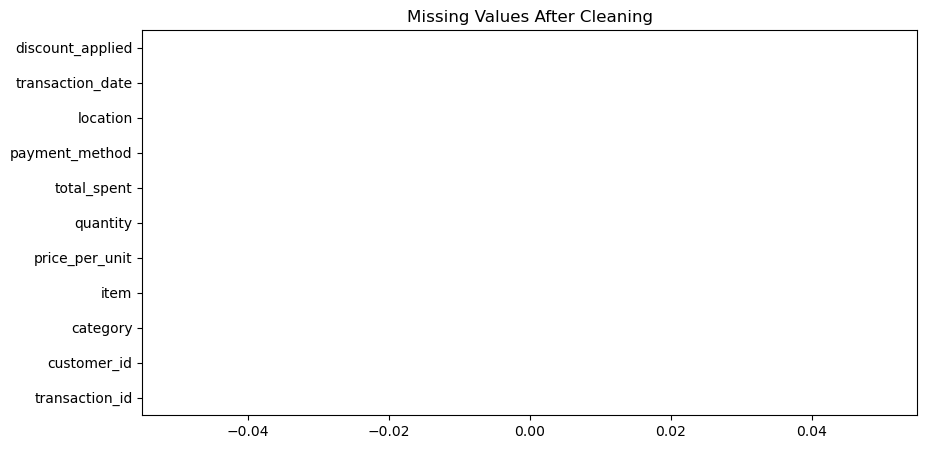

In [25]:
df.isnull().sum().plot(kind='barh', figsize=(10,5), color='steelblue')
plt.title('Missing Values After Cleaning')
plt.show()


5.2 Sales by Category

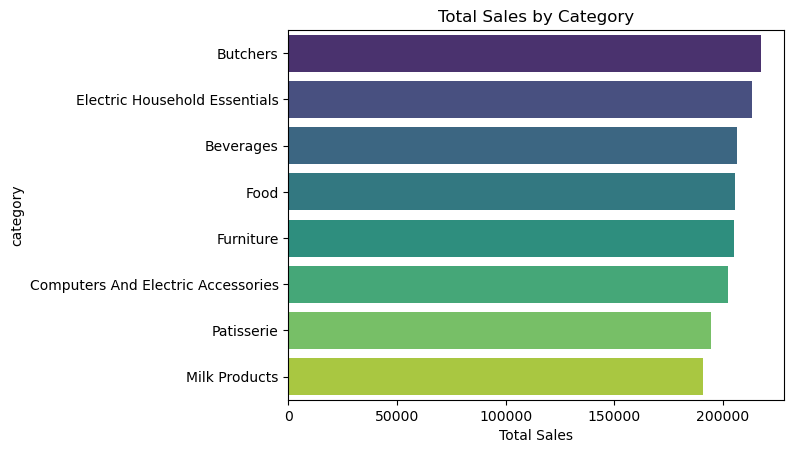

In [26]:
category_sales = df.groupby('category')['total_spent'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')
plt.title('Total Sales by Category')
plt.xlabel('Total Sales')
plt.show()


5.3 Sales by Location

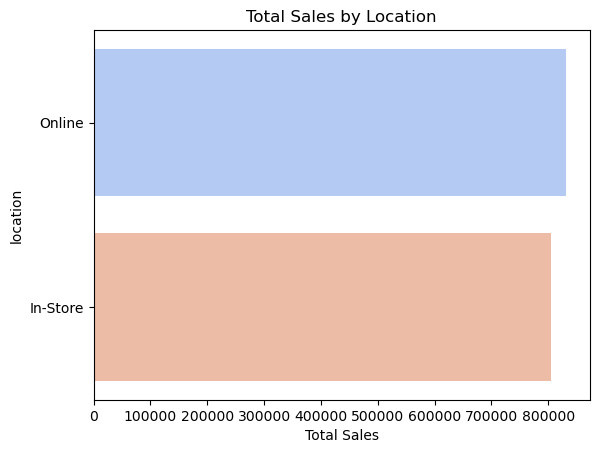

In [28]:
location_sales = df.groupby('location')['total_spent'].sum().sort_values(ascending=False)
sns.barplot(x=location_sales.values, y=location_sales.index, palette='coolwarm')
plt.title('Total Sales by Location')
plt.xlabel('Total Sales')
plt.show()

5.4 Payment Method Usage



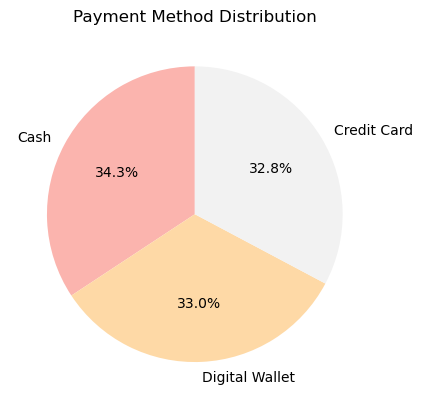

In [29]:
payment_counts = df['payment_method'].value_counts()
payment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Pastel1')
plt.ylabel('')
plt.title('Payment Method Distribution')
plt.show()


5.5 Monthly Sales Trend

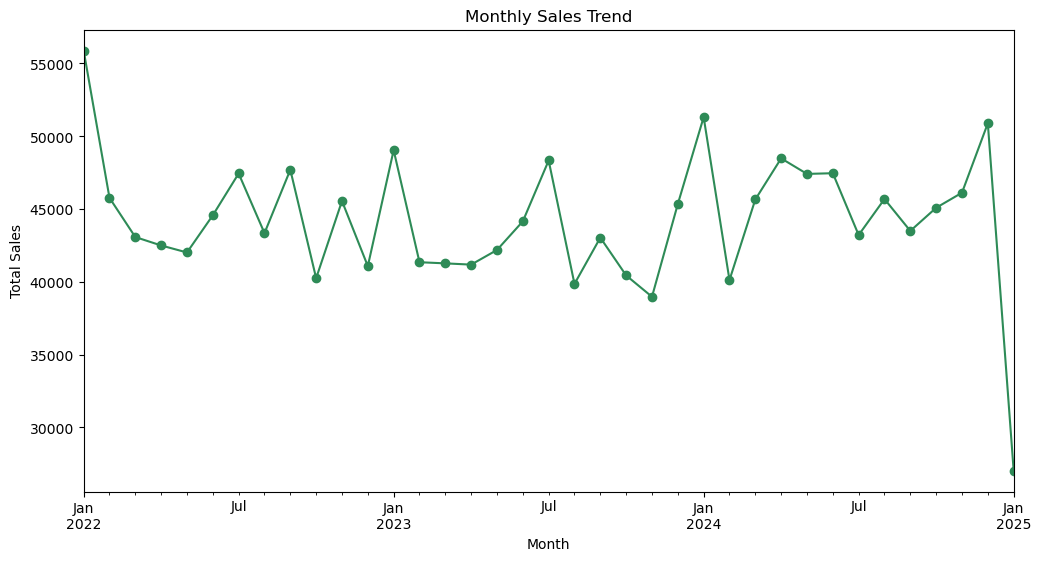

In [30]:
monthly_sales = df.set_index('transaction_date').resample('M')['total_spent'].sum()
monthly_sales.plot(figsize=(12,6), marker='o', color='seagreen')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.show()
